In [5]:
# todo: final_all loc

import pandas as pd
import requests
import time
import re
from bs4 import BeautifulSoup

url = "https://thinkil.co.il/texts-sitemap.xml"
res = requests.get(url)
soup = BeautifulSoup(res.text)
url_text = soup.get_text()
url_text = url_text.splitlines()
url_list = []
for line in url_text:
    if len(line) == 0:
        continue
    if 'https' in line:
        if ('jpg' not in line) and ('png'not in line):
            url_list.append(line)

data_lst = []
url_list = url_list[1:]

for i, url_paper in enumerate(url_list):
    url_0 = url_paper
    res_0 = requests.get(url_0)
    soup_0 = BeautifulSoup(res_0.text)

    title = soup_0.find("h1", {"class": "page-title"}).get_text().strip()
    authors_set = set(author_name.get_text().strip()
        for author_name in soup_0.find_all("span", {"class": "author-name"}))

    if len(authors_set) == 0:
        authors = ""
    else:
        for author in authors_set:
            authors = author + ", "
        authors = authors[:-2]
        
    main_text = soup_0.find("div", {"id": "content"}).get_text()
    main_text = main_text.replace("\t", " ")
    main_text = main_text.replace("\r", " ")
    main_text = main_text.replace("\n", " ")
    main_text = re.sub(' +', ' ', main_text)

    data_lst.append([url_0, authors, title, main_text])

    time.sleep(.4)
    print("Loading article " + str(i + 1) + " out of " + str(len(url_list) + 1))


articles = pd.DataFrame(data_lst, columns=["url", "author", "title", "text"])
articles.to_csv('ex2_part1.tsv', sep="\t",  encoding="utf-8")


Loading article 1 out of 284
Loading article 2 out of 284
Loading article 3 out of 284
Loading article 4 out of 284


4528 3466 3153 5741 3525 3762 5133 5317 5434 4282 9615 6795 7604 4365 4522 3412 4742 4399 4160 4002 2485 2696 3565 2645 2233 3066 3334 4464 3559 2832 3721 17502 3997 5390 4481 2480 4298 6851 3223 4628 6612 1869 9171 3974 4119 3254 5932 4109 3470 4279 4131 6724 7248 6678 4563 4921 6899 5188 5763 3102 6941 3280 3516 26762 4346 1966 1702 2813 5414 4020 3142 4618 4458 6388 2578 6237 3738 5402 3418 5135 2860 4436 3029 7046 3636 2878 4909 3125 4157 5229 717 4417 9305 3533 3978 3220 2658 2999 7048 6787 4091 2382 2424 2935 3514 3623 3997 7333 4675 5084 2883 1920 2839 1689 1387 3222 3134 4706 4364 2210 884 1074 2393 3461 2494 763 4403 2718 3669 1189 2418 3102 3299 2955 3913 3490 3322 3688 3746 3469 3061 3762 2640 4094 3602 4324 3340 2775 1288 4231 6581 5399 2631 3673 3486 1776 3664 2491 2029 1793 1025 231 3923 2232 2363 2679 3252 365 1582 2109 2050 2310 2022 1534 1677 2791 517 3534 1983 286 1667 1681 894 1235 1196 3688 1199 1205 1711 678 2398 815 1250 852 3295 571 1660 1152 629 1894 2733 2436 6

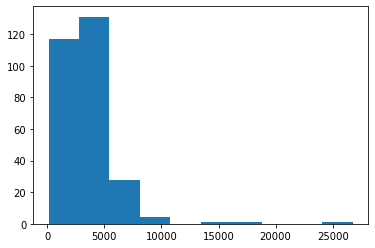

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Q1
def divide_by_whitespace(text):
    return text.split()

def main():
    num_of_words = []
    data_frame = pd.read_csv('D:\\Documents\\hebrew\\ex2\\ex2_part1.tsv', sep='\t')
    # all_words = []
    for index, row in data_frame.iterrows():
        paper_words = divide_by_whitespace(row['text'])

        # Q2 - Add to list
        num_of_words.append(len(paper_words))
        print(len(paper_words), end=" ")

    plt.hist(num_of_words)

main()

של     30680
את     18131
על     11429
הוא     7201
לא      7168
זה      4888
—       4793
כל      4640
או      4485
היא     4465
אם      4053
גם      3825
כי      3439
בין     3243
עם      3056
אין     2699
מה      2645
אך      2498
אלא     2489
היה     2410
dtype: int64


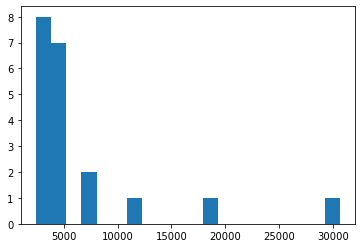

In [13]:
articles = pd.read_csv('D:\\Documents\\hebrew\\ex2\\ex2_part1.tsv', sep='\t')

all_words = []
for article in articles["text"]:
    all_words += divide_by_whitespace(article)

sorted_values = pd.DataFrame(all_words).value_counts()
q3 = sorted_values.iloc[:20]

plt.hist(q3, bins=20)
print(q3)

על ידי        879
על פי         617
את כל         470
לא רק         408
של כל         336
כי אם         291
של האדם       281
לא היה        279
זה של         249
לעומת זאת,    237
על כל         234
על כך         228
על פני        217
להבין את      211
כדור הארץ     202
אלא גם        188
הרבה יותר     188
של המדע       185
עם זאת,       184
יותר מאשר     183
dtype: int64


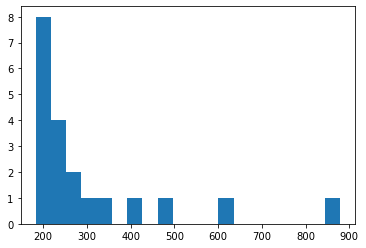

In [17]:
# Q4
def list_of_bigrams(text):
    words = divide_by_whitespace(text)
    return [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]

all_words = []
for article in articles["text"]:
    all_words += list_of_bigrams(article)

sorted_values = pd.DataFrame(all_words).value_counts()
q4 = sorted_values.iloc[:20]

plt.hist(q4, bins=20)
print(q4)

—        4793
–        2114
אינו     1367
אשר      1297
האדם     1279
ידי       938
אינה      902
פי        838
ע״י       813
למשל,     789
זאת,      771
כפי       732
מערכת     716
לבין      701
כיוון     689
כיצד      673
?         667
אצל       665
בכך       647
משום      641
dtype: int64


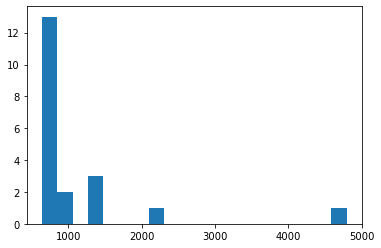

In [20]:
# Q5
def get_hebrew_stopwords():
    stop_path="heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
    return res

def remove_stopwords(words_list, stop_words):
    return [word for word in words_list if word not in stop_words]

all_words = []
stopwords = get_hebrew_stopwords()

for article in articles["text"]:
    all_words += remove_stopwords(divide_by_whitespace(article), stopwords)

sorted_values = pd.DataFrame(all_words).value_counts()
q5 = sorted_values.iloc[:20]

plt.hist(q5, bins=20)
print(q5)


לעומת זאת,        237
כדור הארץ         202
במילים אחרות,     119
תורת היחסות       102
הבירור הטבעי       89
כך, למשל,          84
כדור הארץ.         79
מצד שני,           77
בעת ובעונה         76
פני כדור           75
במלים אחרות,       73
באותה מידה         67
חברת י.ב.מ.        64
יתרה מזו,          60
כיוון שכך,         59
השנים האחרונות     59
המפץ הגדול         56
מצד אחד,           56
בשנים האחרונות     55
צבי ינאי           54
dtype: int64


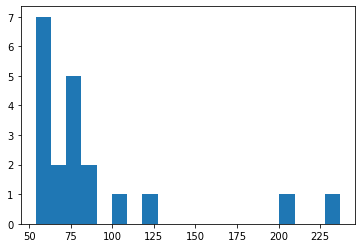

In [25]:
# Q6
def list_of_bigrams(text):
    words = divide_by_whitespace(text)
    return [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]

def remove_stopwords_from_bigrams(bigrams_list, stop_words):
    new_bigrams_list = []
    for bigram in bigrams_list:
        words_in_bigram = bigram.split()
        if not(words_in_bigram[0] in stop_words or words_in_bigram[1] in stop_words):
            new_bigrams_list.append(bigram)
    
    return new_bigrams_list

all_words = []
for article in articles["text"]:
    all_words += remove_stopwords_from_bigrams(list_of_bigrams(article), stopwords)

sorted_values = pd.DataFrame(all_words).value_counts()
q6 = sorted_values.iloc[:20]

plt.hist(q6, bins=20)
print(q6)